<a href="https://colab.research.google.com/github/pateltanvi2992/Prediction-of-Covid-19/blob/main/KNN_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/pateltanvi2992/Covid-19-Classification-dataset/main/Corona-1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset = dataset[dataset.cough != "None"]
dataset["cough"] = dataset["cough"].astype(str).astype(int)
dataset = dataset[dataset.fever != "None"]
dataset["fever"] = dataset["fever"].astype(str).astype(int)
dataset["sore_throat"] = dataset["sore_throat"].astype(str).astype(int)
dataset["shortness_of_breath"] = dataset["shortness_of_breath"].astype(str).astype(int)
dataset["head_ache"] = dataset["head_ache"].astype(str).astype(int)
dataset = dataset[dataset.corona_result != "other"]
dataset = dataset[dataset.gender != "None"]
dataset = dataset[dataset.age_60_and_above != "None"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
print(dataset['gender'].unique())

['male' 'female']


In [ ]:
print(dataset['test_indication'].unique())

['Other' 'Abroad' 'Contact with confirmed']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoder.fit(dataset['gender'])
dataset['gender'] = encoder.transform(dataset['gender'])

In [ ]:
encoder.fit(dataset['age_60_and_above'])
dataset['age_60_and_above'] = encoder.transform(dataset['age_60_and_above'])

In [ ]:
encoder.fit(dataset['test_indication'])
dataset['test_indication'] = encoder.transform(dataset['test_indication'])

In [ ]:
dataset.shape

(136294, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=dataset.iloc[:,6]
le = LabelEncoder()
y = le.fit_transform(y)
X=dataset.iloc[:,[1,2,3,4,5,7,8,9]]

In [ ]:
print(X)

        cough  fever  sore_throat  ...  age_60_and_above  gender  test_indication
122808      1      0            0  ...                 1       1                2
122809      1      0            0  ...                 0       0                2
122810      0      0            0  ...                 0       0                2
122811      0      1            0  ...                 0       0                0
122812      1      0            0  ...                 1       0                2
...       ...    ...          ...  ...               ...     ...              ...
265116      1      1            0  ...                 1       0                0
265117      1      1            1  ...                 0       0                0
265118      1      0            0  ...                 0       0                0
265119      1      0            0  ...                 0       1                2
265120      1      0            0  ...                 0       1                2

[136294 rows x 

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

KNN_classifier= KNeighborsClassifier(n_neighbors=184) 

KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=184)

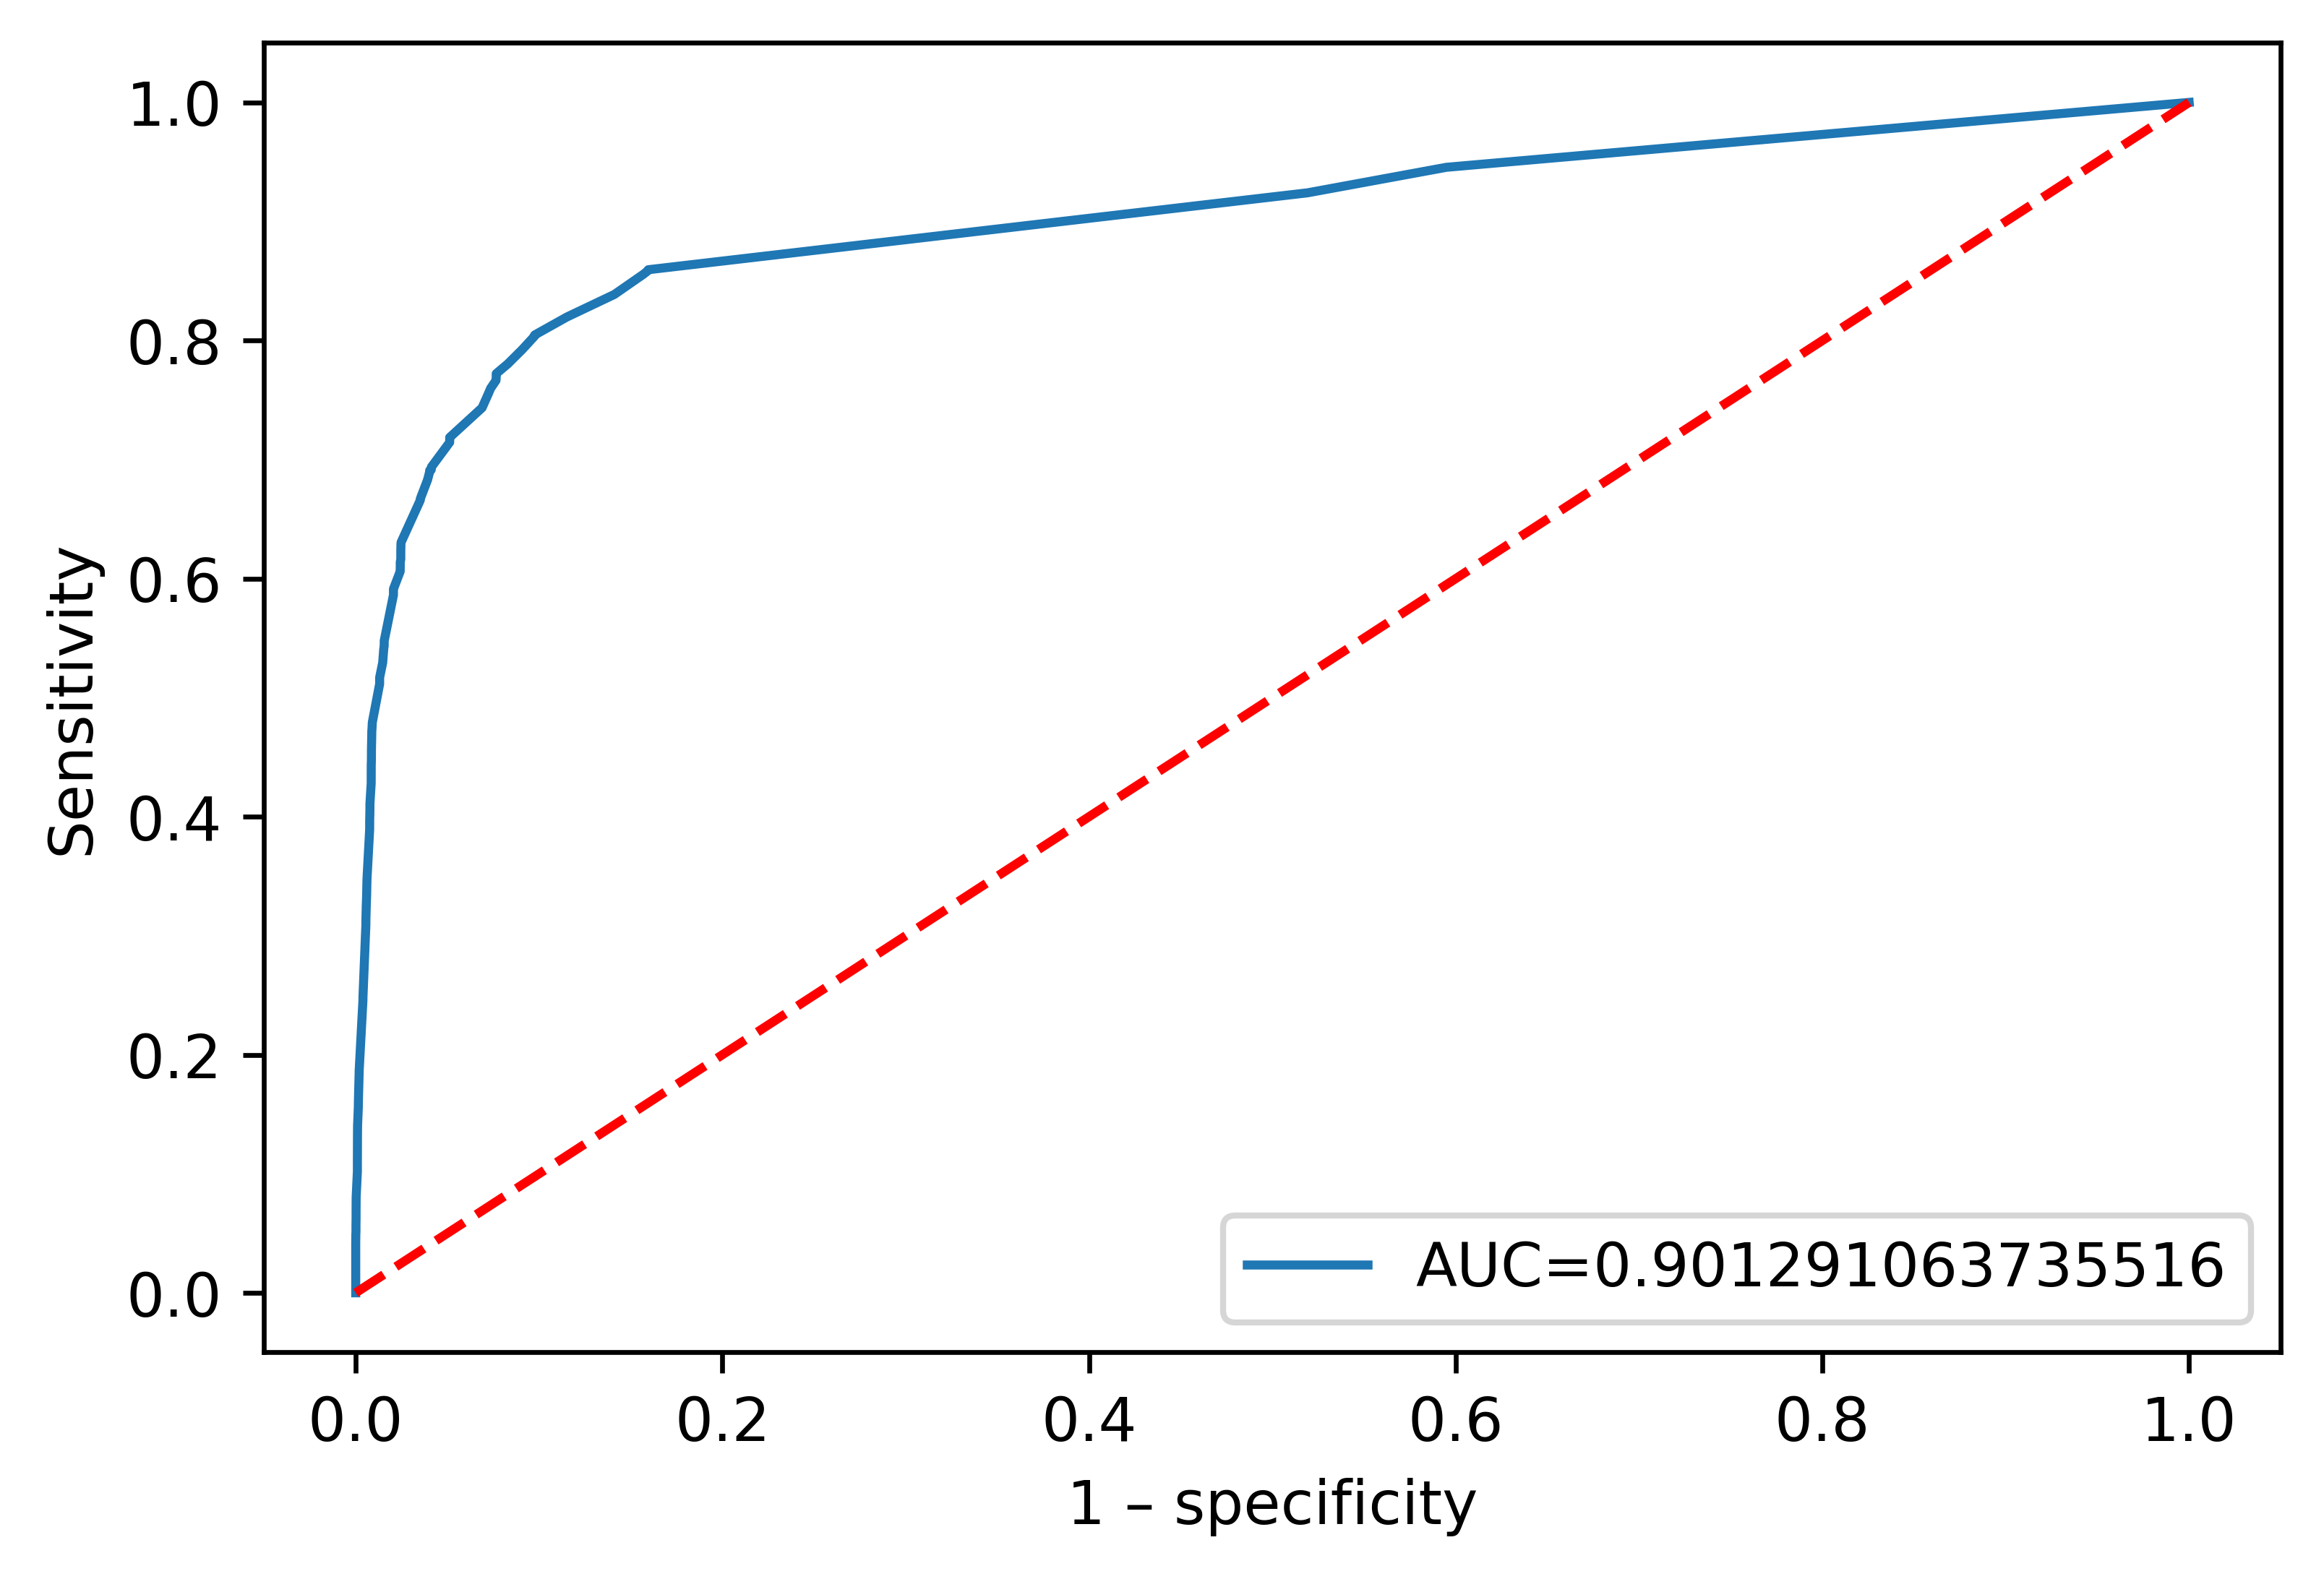

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
#define metrics
y_pred_proba = KNN_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.ylabel('Sensitivity')
plt.xlabel('1 – specificity')
plt.legend(loc=4)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=KNN_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.950231113502409

In [ ]:
KNN_matrix=confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9437447891838416

In [ ]:
precision_score(y_test,y_pred)

0.8178770949720671

In [ ]:
recall_score(y_test,y_pred)

0.4613930034667507

In [ ]:
accuracy_score(y_test,y_pred)

0.950231113502409

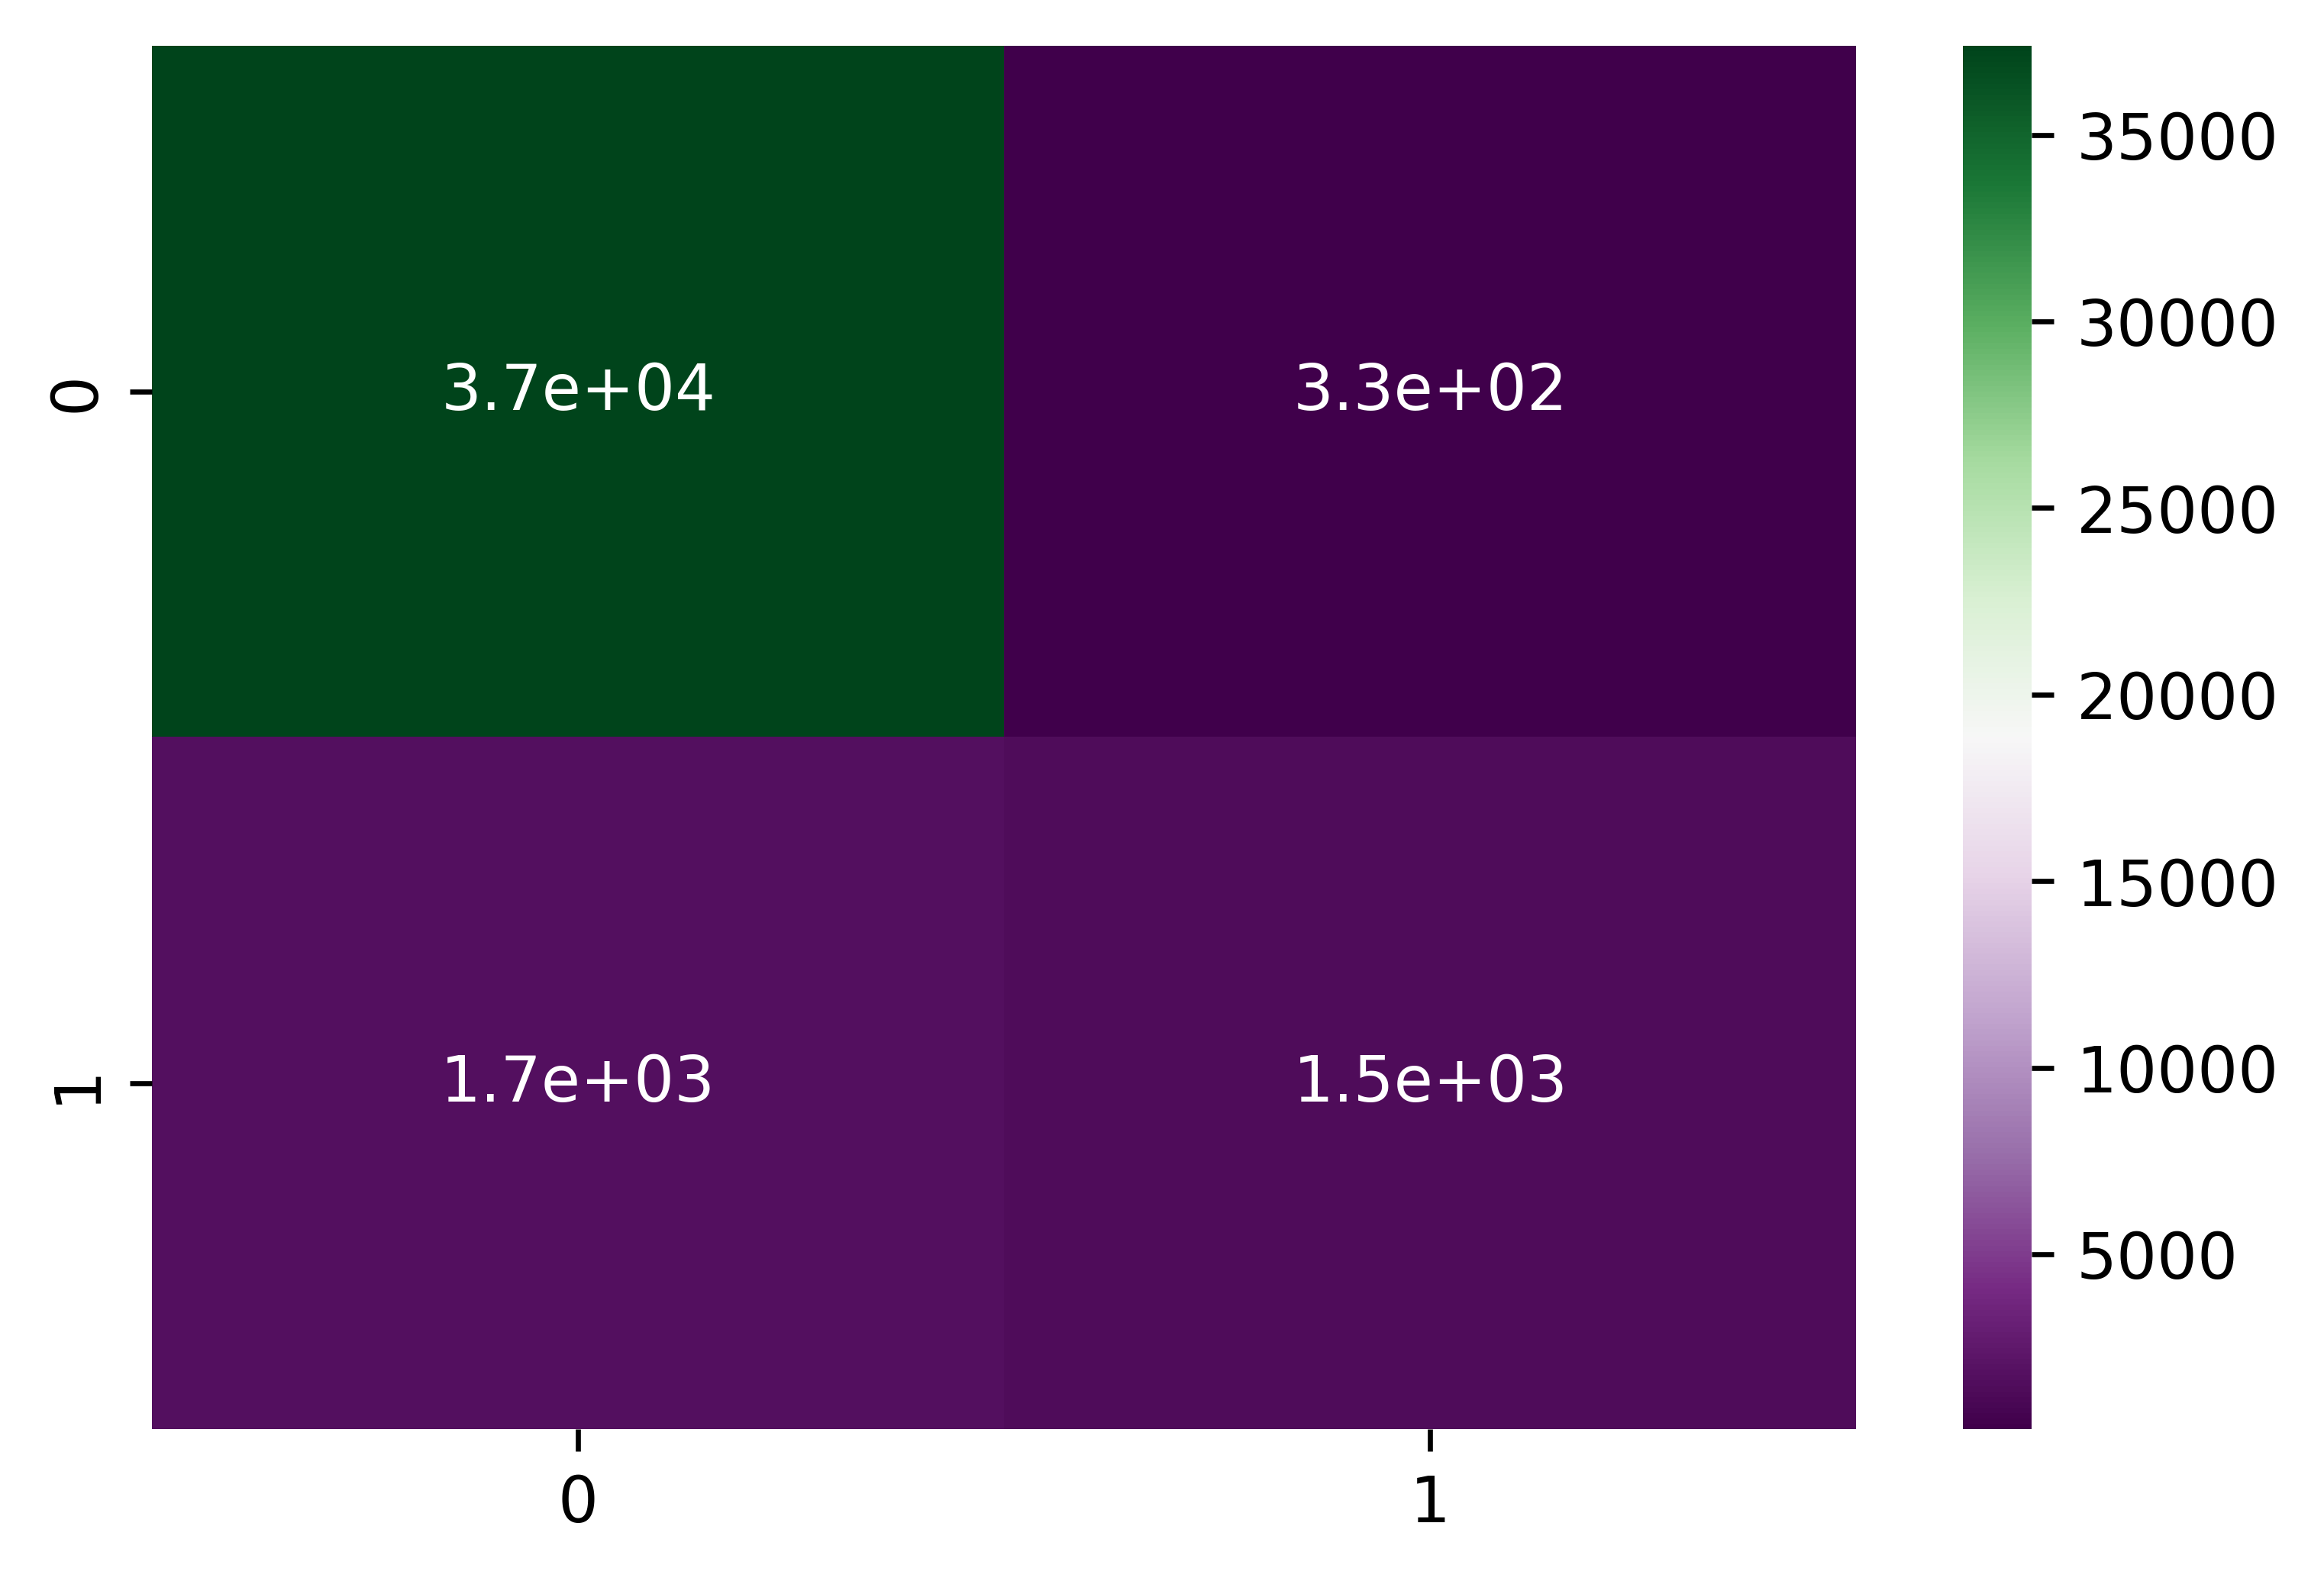

In [ ]:
import seaborn as sns
KNN_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(KNN_matrix, annot=True, cmap='PRGn')

In [ ]:
print(KNN_matrix)

[[37390   326]
 [ 1709  1464]]
